## Spontaneous Magnetization and Equilibrium 



  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]

Initial Energy E =  15.0
Initial magnetization M  =  -2


100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:02<00:00, 35007.07it/s]


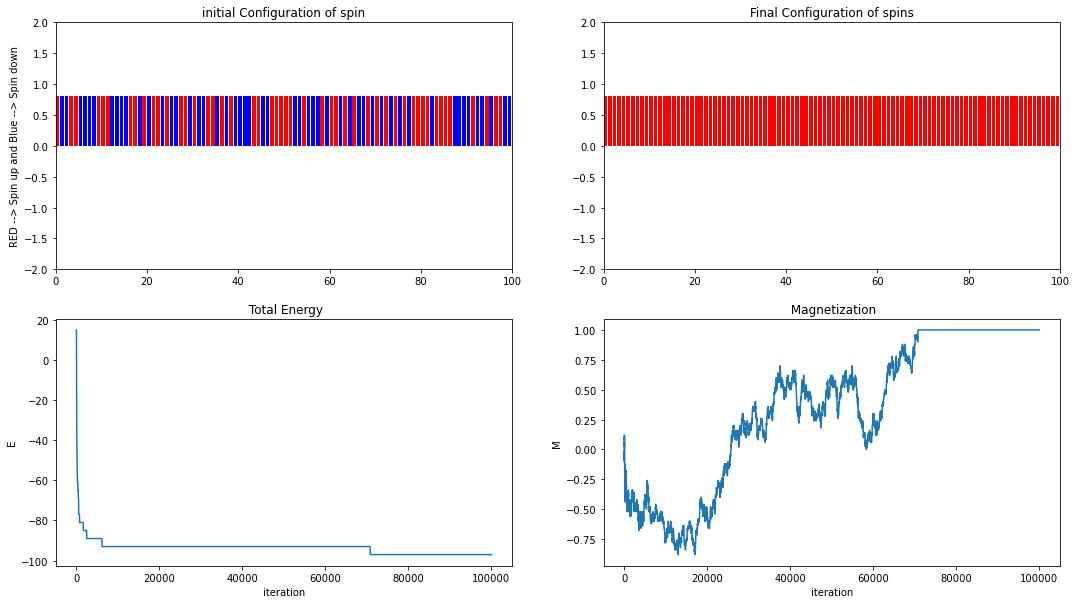

Final_ Energy = -97.0


In [1]:

import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt
from matplotlib import patches as pt
N = 100  ##number of spins
spin_values = np.array([1,-1])
Spin_array = np.random.choice(spin_values,size = N)
J = 1.0
T = .15
Beta = 1.0/T


## Calculating initial energy  
energy = 0
for i in range(N-1):
    energy += -J*Spin_array[i]*Spin_array[i+1]
energy += -J*(Spin_array[0]+Spin_array[N-1])    
E = [energy]    ##storing energy value in a list
print('Initial Energy E = ', energy )

m = np.sum(Spin_array)
Mag = [m]
print('Initial magnetization M  = ', m )



def spin_color(SS):   ## this function is for plotting spins. down spin is blue and up spin is right
    if SS==-1: return 'b';
    else: return 'r'
    
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2,ncols= 2,figsize = (18,10))

ax1.set_xlim(0,N)
ax1.set_ylim(-2,2)
ax1.set_ylabel("RED --> Spin up and Blue --> Spin down")
ax1.set_title("initial Configuration of spin")

for i in range(N):
       
    
    PP = pt.Rectangle((i,0), 0.8, 0.8, fc = spin_color(Spin_array[i]))
    ax1.add_patch(PP)



iter = 100000
STEP = [0]
for i in tqdm(range(iter)):
    r_n = np.random.randint(0,N)
    sigma_mu = Spin_array[r_n]
    del_m = -2*sigma_mu 
    if(r_n == 0):
        Sum = 2*J*sigma_mu*(Spin_array[1]+Spin_array[N-1])
    elif(r_n == N-1):
        Sum = 2*J*sigma_mu*(Spin_array[N-1]+Spin_array[0])
    else:
        Sum = 2*J*sigma_mu*(Spin_array[r_n+1]+Spin_array[r_n-1])
        
    del_E = Sum
   
    
    
    STEP.append(i+1)

     
    if(np.random.uniform()<np.exp(-Beta*del_E)):
        
        Spin_array[r_n] = -1*Spin_array[r_n]
        energy += del_E
        m+= del_m
     
    else:
        Spin_array[r_n] =Spin_array[r_n]
        
    E.append(energy)
    Mag.append(m)
         


ax2.set_xlim(0,N)
ax2.set_ylim(-2,2)
ax2.set_title("Final Configuration of spins")

for i in range(N):
       
    
    PP = pt.Rectangle((i,0), 0.8, 0.8, fc = spin_color(Spin_array[i]))
    ax2.add_patch(PP)

    
## Plotting energy vs Steps to analyzing equillibrium     
ax3.set_title(" Total Energy")
ax3.set_xlabel("iteration")
ax3.set_ylabel("E")
ax3.plot(STEP,E)

ax4.set_title(" Magnetization")
ax4.set_xlabel("iteration")
ax4.set_ylabel("M")
ax4.plot(STEP,np.array(Mag)/N)
plt.show()

print("Final_ Energy =", E[iter])


So what do we do with our Monte Carlo program for the Ising model, once
we have written it? Well, we probably want to know the answer to some
questions like "What is the magnetization at such-and-such a temperature?",
or "How does the internal energy behave with temperature over such-and such
a range?" To answer these questions we have to do two things. First we
have to run our simulation for a suitably long period of time until it has come
to equilibrium at the temperature we are interested in—this period is called
the equilibration time and then we have to measure the quantity we
are interested in over another suitably long period of time and average it


for eq. in upper programme we see that after 80000(not necessarily true at all temperature) iteration system reaches equillibrium. so we will start collecting data if we surpass this threshold number.

# we will create a temperature array and for each temperature we will find the average quantities. 




In [ ]:

import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt
from matplotlib import patches as pt
N = 100  ##number of spins
spin_values = np.array([1,-1])
Spin_array = np.random.choice(spin_values,size = N)
J = 1.0




########################################################################################################
    
temp_array = np.linspace(0.1,5,70)
N_iter = int(len(temp_array))
## list for storing average values and thier squared average
E_avg = np.array([]) 
M_avg =np.array([])

E2_avg =np.array([])
M2_avg =np.array([])
for step in tqdm(range(N_iter)):
    
    T = temp_array[step]
    
    Beta = 1.0/T

    spin_array = Spin_array
    ## Calculating initial energy  
    energy = 0
    for k in range(N-1):
        energy += -J*spin_array[k]*spin_array[k+1]
    energy += -J*spin_array[0]*spin_array[N-1]    
    m = np.sum(spin_array)    
        
    E = []    ##storing energy value in a list
    E_2 = []
    
    

    Mag = []
    Mag_2 = []






    iter = 300000
   
    for i in range(iter):
        r_n = np.random.randint(0,N)
        sigma_mu = spin_array[r_n]
        del_m = -2*sigma_mu
        if(r_n == 0):
            Sum = 2*J*sigma_mu*spin_array[r_n+1]
        elif(r_n == N-1):
            Sum = 2*J*sigma_mu*spin_array[r_n-1]
        else:
            Sum = 2*J*sigma_mu*(spin_array[r_n+1]+spin_array[r_n-1])

        del_E = Sum
        


        

        if(np.random.uniform()<np.exp(-Beta*del_E)):
            spin_array[r_n] = -1*spin_array[r_n]
            energy += del_E
            m+= del_m
        
            

        else:
            spin_array[r_n] =spin_array[r_n]
            
        a = 0 ## this is for nothing
        
        if(i>=100000 and i%N==0):  ##after 100000 iteration we will collect data at each 200th step
            
            
            E.append(energy)
            E_2.append(energy**2)
            Mag.append(abs(m))
            Mag_2.append(m**2)


    E_avg = np.append(E_avg,(np.mean(np.array(E))))
    M_avg = np.append(M_avg,np.mean(np.array(Mag)))
    
    E2_avg = np.append(E2_avg,np.mean(np.array(E_2)))
    M2_avg = np.append(M2_avg,np.mean(np.array(Mag_2)))
      
    

        
         


# Plotting Graphs

In [ ]:
## Specific Heat Array
B2 = (1.0/temp_array)**2
C = (B2/N)*(E2_avg-(E_avg)**2)


## Succeptibility atrray
CHI = (1/temp_array)*N*(((M2_avg/(N*N))-(M_avg/N)**2))
                        
                        
                        
                        
                        
                        
                        


fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2,ncols= 2,figsize = (18,10))

ax1.set_title(" Average Energy vs temperature")
ax1.plot(temp_array,E_avg)



ax2.set_title(" Specific heat C vs temperature")
ax2.plot(temp_array,C)

ax3.set_title(" Magnetization M vs temperature")
ax3.plot(temp_array,M_avg/N)





ax4.set_title(" Succeptibility vs temperature ")
ax4.plot(temp_array,CHI)


plt.show()